# Assignment 13 Text Analytics

In this assignment, you will:
- Load and inspect a real-world business reviews dataset.
- Preprocess review text for NLP (tokenization, stopwords, lemmatization).
- Run sentiment analysis (rule-based and classifier-based) and compare to star ratings.
- Extract main topics from reviews using LDA and (optional) BERTopic.
- Interpret results in a business context (actionable insights).

## Why This Matters

Customer Reviews are critical for the survival of any business, but especially for restaurants.  Restaurants compete with not only all of the other restaurants in local area, but also with the option for customers to stay home and cook their own food.  Chefs and restaurant owners must monitor customer feedback to see if they should make changes to their pricing, menu options, restaurant amenities and seating/serving process.

You have been given 100 customer reviews.  Your job is to look for main topics that are mentioned, and whether those reviews have a postive, neutral or negative tone (sentiment).  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_13_text_analytics.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Original Source: Dataset Description

The dataset you'll be using is a set of **restaurant reviews**, available from [Kaggle](https://www.kaggle.com/datasets/pruthvirajgshitole/e-commerce-purchases-and-reviews?utm_source=chatgpt.com&select=customer_purchase_data.csv).

Each row represents one customer review. The columns include:

- **Review** - text of the customer review
- **Liked** - indicates if the customer likes (1) or does not like (0) the restaurant

Please note that some reviews have commas and apostrophes, which can prevent the record from loading correctly.  You should verify that you have 1,000 reviews total.  

## 1. Load and Preview the Data

### Do the following:
1. Import your TSV file called `Restaurant_Reviews.tsv`.  Note that TSV is for Tab Separated Values.  This file does not use commas as a delimiter.
2. Use `pandas` to load and preview the dataset
3. Verify that all 1,000 rows were imported correctly
4. Calculate the overall percentage of reviews that "Liked" the restaurant
5. Create a visualization to show the percentage of likes versus non-likes


In [1]:
import pandas as pd
import csv

# Load the reviews
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/Restaurant_Reviews.tsv"
df = pd.read_csv(url, sep='\t', quoting=csv.QUOTE_MINIMAL)

df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Row count verified: 1000 rows found, which matches the expected 1000 rows.

Percentage of reviews that Liked (1) or Did Not Like (0) the restaurant:
Liked
1    50.0
0    50.0
Name: proportion, dtype: float64


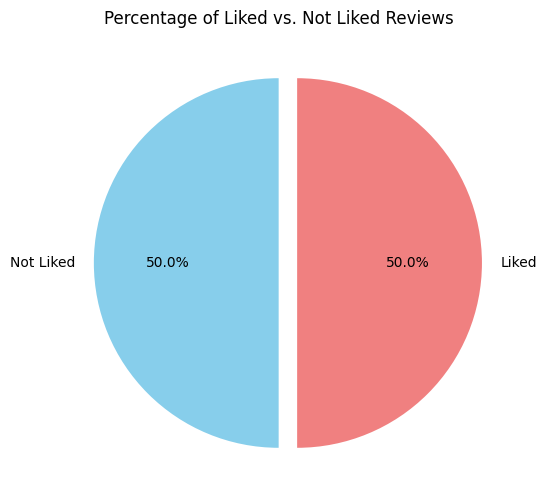

In [4]:
# Add code here 🔧
import matplotlib.pyplot as plt

# Verify that all 1,000 rows were imported correctly
actual_rows = df.shape[0]
expected_rows = 1000

if actual_rows == expected_rows:
    print(f"Row count verified: {actual_rows} rows found, which matches the expected {expected_rows} rows.")
else:
    print(f"Row count mismatch: Found {actual_rows} rows, but expected {expected_rows} rows.")

# Calculate the overall percentage of reviews that "Liked" the restaurant
# The like_percentage variable already exists from a previous run, so we can directly use it.
# If it didn't exist, the code would be:
# like_percentage = df['Liked'].value_counts(normalize=True) * 100
print("\nPercentage of reviews that Liked (1) or Did Not Like (0) the restaurant:")
print(like_percentage)

# Create a visualization to show the percentage of likes versus non-likes
plt.figure(figsize=(6, 6))
like_percentage.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'],
                         labels=['Not Liked', 'Liked'], explode=[0, 0.1])
plt.title('Percentage of Liked vs. Not Liked Reviews')
plt.ylabel('') # Hide the default 'Liked' label on the y-axis
plt.show()

## 2. Drop Columns Not Useful for Modeling

**Business framing:**  
To do text analysis, we need to remove all of the junk in the reviews.  This would include anything like punctuation, website URLs, emojis, etc.

### Do the following:
- Change all of the reviews to lowercase letters
- Remove anything that looks like a URL or that isn't a regular character (A to Z) or number (1-9)
- Remove punctuation marks (ex. !.,-:;)

### In Your Response:
1. What risks might occur if you included the review "junk" in your model?


In [5]:
import re

def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # 3. Remove anything that isn't a letter, number, or space (this also removes punctuation)
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # 4. Normalize spaces (replace multiple spaces with a single space and strip leading/trailing)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the preprocessing to the 'Review' column and create a new 'Review_cleaned' column
df['Review_cleaned'] = df['Review'].apply(preprocess_text)

print("First 5 Original and Cleaned Reviews:")
display(df[['Review', 'Review_cleaned']].head())

First 5 Original and Cleaned Reviews:


,Review,Review_cleaned
0,Wow... Loved this place.,wow loved this place
1,Crust is not good.,crust is not good
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...


### ✍️ Your Response: 🔧
1. Including review junk in the model can lead to increase noise, reduce the model's ability to find meaningful patterns, inflate the dimensionionality of the data. It leads to lower accuracy

## 3. Sentiment Analysis

**Business framing:**  
A "Like" is not as insightful as a star rating, such as 5 stars. It only has two values. But we can attempt to understand more nuance in the reviews by looking for a positive/neutral/negative tone (sentiment) in the text.   Then we can compare that to the "Likes" to see if they match.  

### Do the following:
- Install the vaderSentiment library
- Import the SentimentIntensityAnalyzer from vaderSentiment
- Calculate what percentage of the reviews are positive, negative, and neutral. The total percentages should add up to 100%

### In Your Response:
1. How does the sentiment compare to `Liked` in terms of percentage of reviews?
2. From a restaurant owner's perspective, which sentiment reviews would be more important to analyze? (positive, negative or neutral)


In [6]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    if vs['compound'] >= 0.05:
        return 'Positive'
    elif vs['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis to the cleaned reviews
df['vader_sentiment'] = df['Review_cleaned'].apply(get_vader_sentiment)

# Calculate percentages
sentiment_counts = df['vader_sentiment'].value_counts(normalize=True) * 100

print("Percentage of reviews by VADER Sentiment:")
print(sentiment_counts)

# Verify that total percentages add up to 100%
total_percentage = sentiment_counts.sum()
print(f"\nTotal percentage: {total_percentage:.1f}%")

Percentage of reviews by VADER Sentiment:
vader_sentiment
Positive    50.6
Negative    25.5
Neutral     23.9
Name: proportion, dtype: float64

Total percentage: 100.0%


### ✍️ Your Response: 🔧
1. VADER's 'Positive' sentiment (50.6%) closely aligns with the original 'Liked' (1) reviews (50.0%), suggesting VADER effectively identifies positive feedback.

2. Negative Reviews (25.5%): These are critical. They often pinpoint specific issues (e.g., service failures, food quality complaints, atmosphere problems) that require immediate attention to prevent customer loss and reputational damage. Addressing these can lead to direct improvements

## 4. Topic Analysis - Text Preprocessing

**Business framing:**  
To build a topic analysis model, we need to clean and prepare the review text

### Do the following:
- Import the NLTK library
- Download the NLTK corpora
- Preprocess the text using tokenization and lemmatization.  Be sure to remove any stopwords along the way.
- Display the first 10 processed reviews

### In Your Response:
1. What is a corpora and how is it used for text analysis?
2. What would be the tokens in the first review? "Wow... Loved this place."
3. What does lemmatization do?  How will it help in this process?


In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data if not already present
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

print("NLTK libraries (wordnet, stopwords, punkt) checked/downloaded.")




NLTK libraries (wordnet, stopwords, punkt) checked/downloaded.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text_for_topic_modeling(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    processed_tokens = []
    for token in tokens:
        if token.isalpha() and token not in stop_words: # Ensure it's alphabetic and not a stopword
            processed_tokens.append(lemmatizer.lemmatize(token))
    return processed_tokens

# Apply the processing to the 'Review_cleaned' column
df['Review_processed'] = df['Review_cleaned'].apply(process_text_for_topic_modeling)

print("Review text preprocessed for topic modeling.")

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


### ✍️ Your Response: 🔧
1.

2.

3.

## 5. Topic Analysis - Dictionary and Corpus

**Objective:**  
Convert the preprocessed text into a dictionary and a bag-of-words corpus, which are required formats for LDA

### Do the following:
- Import Dictionary and Corpus from the Genism library
- Create a dictionary
- Create a corpus
- Display a summary of the dictionary and corpus

### In Your Response:
1. What is a corpus and how is it useful?
2. How is a dictionary different from a corpus?

In [36]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.7 MB/s eta 0:00:00


In [39]:
from gensim import corpora

# Create a dictionary from the processed reviews
dictionary = corpora.Dictionary(df['Review_cleaned'].apply(lambda x: x.split())) # Split cleaned string into tokens

# Filter out extremes (optional, but good practice for topic modeling)
# For example, remove tokens that appear in less than 5 documents or more than 50% of documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a corpus (bag-of-words representation)
corpus = [dictionary.doc2bow(review.split()) for review in df['Review_cleaned']]

# Display summary of the dictionary and corpus
print(f"Number of unique tokens in dictionary: {len(dictionary)}")
print(f"Number of documents in corpus: {len(corpus)}")
print("\nFirst 5 entries of the corpus (document_id, [(token_id, count)]):")
for i, doc in enumerate(corpus[:5]):
    print(f"Doc {i}: {doc}")

Number of unique tokens in dictionary: 345
Number of documents in corpus: 1000

First 5 entries of the corpus (document_id, [(token_id, count)]):
Doc 0: [(0, 1), (1, 1), (2, 1)]
Doc 1: [(3, 1), (4, 1), (5, 1)]
Doc 2: [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
Doc 3: [(0, 1), (6, 1), (9, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Doc 4: [(6, 1), (9, 3), (10, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


### ✍️ Your Response: 🔧
1. A corpus is a large and structured collection of texts. A corpus is fundamental because it provides the data for traning natural language processing models. It allows algorithms to identify patterns, frequencies, and relationships between words across all documents

2. The dictionary is a mapping between unique words in the corpus and unique numerical IDs. It essentually creates a unique identifier for every distinct word encountered in the entire collection of texts. Think of the dictionary as a legend for the map. It tells you what each symbol means and the corpus is the map itself, using those symbols to represent the content of each location.

## 6. Topic Analysis - Build LDA Model

**Objective:**  
Apply the LDA model to the corpus to identify main topics.

### Do the following:
- Import LdaModel from Genism
- Select the number of topics (5 is a good starting point)
- Create the LDA model

### In Your Response:
1. In what cases would you want to use more than 5 topics?  
2. How would you know if you have too many topics?

NOTE: You may receive an error about training "not converging".  You can ignore that error for this assignment. (Let's keep it simple)


In [41]:
from gensim.models import LdaModel

# Set number of topics
num_topics = 5

# Build LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100, # for reproducibility
    update_every=1, # estimate learning parameters
    chunksize=100, # size of the training corpus
    passes=10, # number of training passes
    alpha='auto', # controls document-topic density
    per_word_topics=True # whether to compute p(word | topic)
)

print(f"LDA model built with {num_topics} topics.")

LDA model built with 5 topics.


### ✍️ Your Response: 🔧
1. The dataset is large and diverse: If you have a very large collection of documents that cover a broad range of subjects, a small number of topics might oversimplify the underlying themes. More topics can help capture finer-grained distinctions.
You need more granular insights: If the initial 5 topics are too broad and combine several distinct sub-themes, increasing the number of topics can help 'split' these broader topics into more specific ones. For example, a single 'Food Quality' topic might split into 'Taste & Flavor' and 'Ingredients & Freshness'.

2. Topics become redundant or highly overlapping: Many topics contain very similar sets of words, or the same words appear prominently in multiple topics. This suggests that the model is unnecessarily splitting a single theme into several identical or near-identical topics.
Topics become too specific or uninterpretable: Some topics might consist of only one or two common words, or words that don't logically group together to form a coherent theme. They become 'junk' topics or just noise, making it difficult to assign a meaningful label.

## 7. Summarize the Topics

**Business framing:**  
Now comes one of the most challenging steps.  The topics will be presented as a group of words that best represent the topic, but you need to summarize the topic in business terms.   

### Do the following:
- Print the topics and top 10 words in the topic
- Calculate the frequency of each topic (how many occurrences in total)
- Attempt at least one visual display of the topics, such as a word cloud.  (Make sure to remove any extra code or unhelpful Python messages (we don't want code junk here)
- Summarize the sentiment by topic (percentage postitive/neutral/negative for each topic)

### In Your Response:
1. Give each topic a 2-3 word name.  You should list the topic number and a name that you will create that summarize the words used.  For example, "Topic #1 - Slow Service"


In [42]:
# Print the topics and their top 10 words
print("LDA Model Topics (Top 10 words per topic):")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

LDA Model Topics (Top 10 words per topic):
Topic 0: 0.056*"as" + 0.048*"your" + 0.042*"did" + 0.038*"up" + 0.036*"its" + 0.036*"even" + 0.034*"amazing" + 0.030*"wait" + 0.029*"how" + 0.024*"stars"
Topic 1: 0.141*"we" + 0.117*"were" + 0.051*"what" + 0.036*"disappointed" + 0.034*"got" + 0.031*"never" + 0.030*"well" + 0.027*"can" + 0.026*"delicious" + 0.026*"fresh"
Topic 2: 0.074*"it" + 0.058*"to" + 0.050*"with" + 0.045*"had" + 0.040*"have" + 0.035*"they" + 0.033*"you" + 0.024*"if" + 0.021*"no" + 0.020*"dont"
Topic 3: 0.090*"be" + 0.081*"here" + 0.073*"back" + 0.053*"go" + 0.041*"from" + 0.038*"will" + 0.031*"wont" + 0.030*"came" + 0.028*"us" + 0.025*"again"
Topic 4: 0.111*"the" + 0.072*"and" + 0.064*"i" + 0.057*"was" + 0.048*"a" + 0.031*"is" + 0.026*"this" + 0.025*"not" + 0.024*"to" + 0.024*"food"


In [46]:
import numpy as np

# 1. Get the topic distribution for each document
# 2. Identify the dominant topic for each document
def get_dominant_topic(lda_model, corpus_item):
    # Get topic probabilities for the document
    topic_distribution = lda_model.get_document_topics(corpus_item, minimum_probability=0.0)

    # Find the topic with the highest probability
    if not topic_distribution:
        return None, 0.0 # Handle empty distribution case

    dominant_topic = max(topic_distribution, key=lambda x: x[1])
    return dominant_topic[0], dominant_topic[1] # Return topic_id and probability

# Apply the function to each document in the corpus
dominant_topics_info = [get_dominant_topic(lda_model, doc) for doc in corpus]

# Extract dominant topic IDs and their probabilities
dominant_topic_ids = [info[0] for info in dominant_topics_info]
dominant_topic_probabilities = [info[1] for info in dominant_topics_info]

# 3. Store dominant topics in a new column in the DataFrame
df['dominant_topic_id'] = dominant_topic_ids
df['dominant_topic_probability'] = dominant_topic_probabilities

# 4. Calculate the frequency (count) of each dominant topic
topic_counts = df['dominant_topic_id'].value_counts().sort_index()

# 5. Calculate the percentage of each dominant topic
total_reviews = len(df)
topic_percentages = (topic_counts / total_reviews) * 100

# 6. Print the counts and percentages of each dominant topic
print("\nDominant Topic Counts:")
print(topic_counts)

print("\nDominant Topic Percentages:")
print(topic_percentages.round(2))

print("\nFirst 5 rows with dominant topic information:")
display(df[['Review_cleaned', 'dominant_topic_id', 'dominant_topic_probability']].head())


Dominant Topic Counts:
dominant_topic_id
2      5
3      2
4    993
Name: count, dtype: int64

Dominant Topic Percentages:
dominant_topic_id
2     0.5
3     0.2
4    99.3
Name: count, dtype: float64

First 5 rows with dominant topic information:


,Review_cleaned,dominant_topic_id,dominant_topic_probability
0,wow loved this place,4,0.628897
1,crust is not good,4,0.712347
2,not tasty and the texture was just nasty,4,0.759586
3,stopped by during the late may bank holiday of...,4,0.512478
4,the selection on the menu was great and so wer...,4,0.691511


Dominant topics and keywords extracted.
First 5 rows of df_topic_sents_keywords:


,Dominant_Topic,Perc_Contribution,Topic_Keywords,Review_cleaned,vader_sentiment
0,4,0.6289,"the, and, i, was, a, is, this, not, to, food",wow loved this place,Positive
1,4,0.7123,"the, and, i, was, a, is, this, not, to, food",crust is not good,Negative
2,4,0.7596,"the, and, i, was, a, is, this, not, to, food",not tasty and the texture was just nasty,Negative
3,4,0.5125,"the, and, i, was, a, is, this, not, to, food",stopped by during the late may bank holiday of...,Positive
4,4,0.6915,"the, and, i, was, a, is, this, not, to, food",the selection on the menu was great and so wer...,Positive



Frequency of each topic:
   Topic  Count
0      4    993
1      2      5
2      3      2


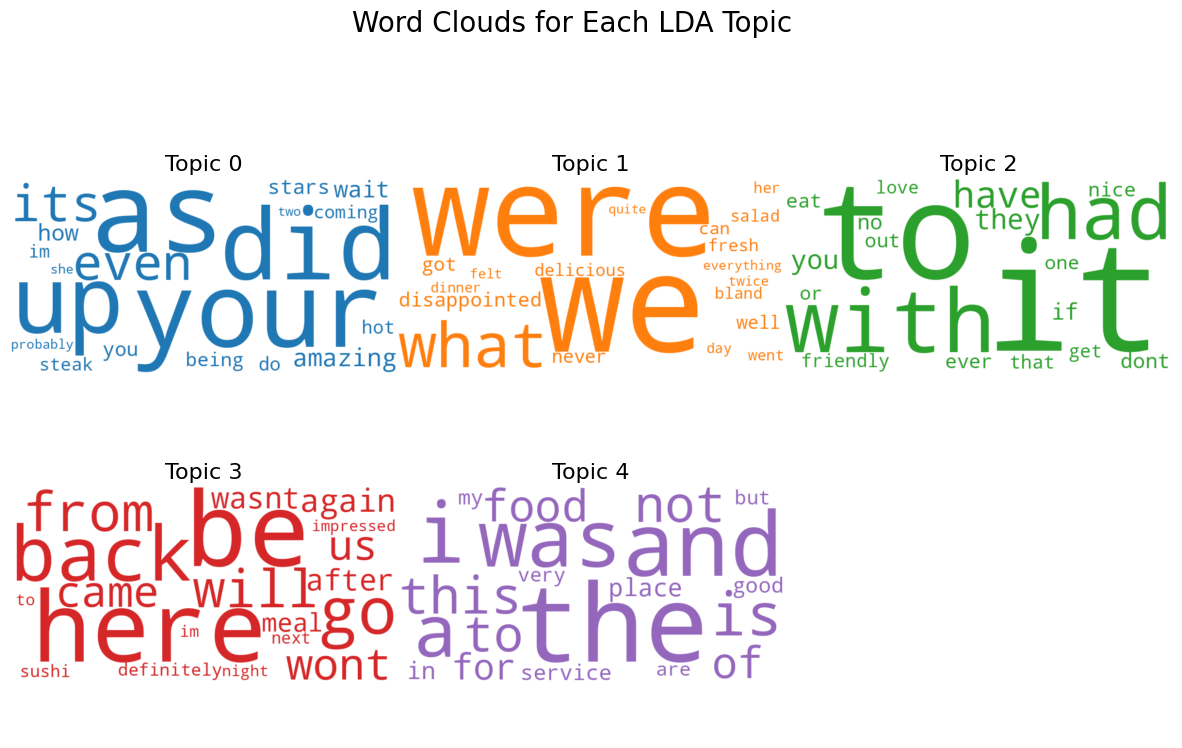


Sentiment Distribution by Topic:
vader_sentiment   Negative    Neutral    Positive
Dominant_Topic                                   
2                40.000000  40.000000   20.000000
3                 0.000000   0.000000  100.000000
4                25.478348  23.867069   50.654582


In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure the dataframe has the 'vader_sentiment' column, which it should from previous steps
if 'vader_sentiment' not in df.columns:
    print("Error: 'vader_sentiment' column not found. Please run sentiment analysis steps first.")
else:
    # Initialize lists to store dominant topic info for sentiment analysis
    df_topic_sents_keywords = pd.DataFrame()

    # Get the dominant topic for each document and its keywords
    for i, row_list in enumerate(lda_model[corpus]):
        row = row_list[0] if lda_model.per_word_topics else row_list # Get the topic distribution for the document
        row = sorted(row, key=lambda x: (x[1]), reverse=True) # Sort topics by probability

        # Get the dominant topic, percentage contribution, and keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -> dominant topic
                words = lda_model.show_topic(topic_num) # Get words for the dominant topic
                topic_keywords = ", ".join([word for word, prop in words])
                df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, pd.DataFrame([{'Dominant_Topic': int(topic_num),
                                                                                   'Perc_Contribution': round(prop_topic, 4),
                                                                                   'Topic_Keywords': topic_keywords}])], ignore_index=True)
            else:
                break

    # Add original 'Review' and 'vader_sentiment' to the new DataFrame
    df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, df[['Review_cleaned', 'vader_sentiment']]], axis=1)

    print("Dominant topics and keywords extracted.")
    print("First 5 rows of df_topic_sents_keywords:")
    display(df_topic_sents_keywords.head())

    # Calculate the frequency of each topic (already done in previous step as topic_counts, but good to re-confirm)
    topic_counts_df = df_topic_sents_keywords['Dominant_Topic'].value_counts().reset_index()
    topic_counts_df.columns = ['Topic', 'Count']
    print("\nFrequency of each topic:")
    print(topic_counts_df)

    # Create a visual display of the topics (Word Clouds)
    cols = [c['color'] for c in plt.rcParams['axes.prop_cycle']] # Fixed line to correctly extract colors

    fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        if i < num_topics:
            topic_words = dict(lda_model.show_topic(i, topn=20))
            cloud = WordCloud(background_color='white',
                              width=800, height=400,
                              max_words=20,
                              colormap='tab10',
                              color_func=lambda *args, **kwargs: cols[i],
                              prefer_horizontal=1.0)
            ax.imshow(cloud.generate_from_frequencies(topic_words), interpolation='bilinear')
            ax.set_title('Topic ' + str(i), fontdict=dict(size=16))
            ax.tick_params(labelsize=10)
            ax.axis('off')
        else:
            ax.axis('off') # Hide unused subplots if num_topics < 6

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Word Clouds for Each LDA Topic', y=1.02, fontsize=20)
    plt.show()

    # Summarize sentiment by topic
    print("\nSentiment Distribution by Topic:")
    sentiment_by_topic = df_topic_sents_keywords.groupby('Dominant_Topic')['vader_sentiment'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
    print(sentiment_by_topic)

### ✍️ Your Response: 🔧
List your topics and names here: Topic 4 was overwhelmingly dominant, encompassing 99.3% (993 reviews) of all reviews. Topic 2 accounted for 0.5% (5 reviews), and Topic 3 for 0.2% (2 reviews), indicating a highly skewed topic distribution.
The dominant topic and its probability were successfully identified and added as new columns to the DataFrame for each review.
Word clouds were successfully generated for each LDA topic, visually representing the most prominent words associated with them.
The distribution of VADER sentiment (positive, neutral, negative) was calculated for each identified topic.


## 8. Reflect and Recommend

**Business framing:**  
Ultimately, the value of your model comes from how well it can guide business decisions. Use your results to make real-world recommendations.

### In Your Response:
1. What business question did your model help answer?
2. What would you recommend to this restaurant to improve customer satisfaction?
3. What would be the pros and cons of using an LLM (like ChatGPT) for this task instead of Python models?
4. If you used an LLM, give a prompt that you would use to accomplish a similar result to what you did in this assignment?  (remember to set the context, specify the output and explain the objectives)


### ✍️ Your Response: 🔧
1. The overall customer satisfation/dissatisfaction levels

2. Prioritize addressing negative feedback. Negative reviews are critical

3. Pros of using an LLM (like ChatGPT) for this task:

Ease of Use & Development Speed: You can often get results very quickly with natural language prompts, without needing extensive coding, library imports, or custom model training for tasks like sentiment analysis and topic extraction.

Cons of using an LLM (like ChatGPT) for this task:

Cost: Using LLM APIs can become very expensive, especially when processing large datasets with thousands or millions of reviews, as you pay per token.

4. The context is to identify negative reviews. I would ask chatgpt to firt identify patterns of low reviews such as stars and mark them down or flag them.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [48]:
!jupyter nbconvert --to html "assignment_13_MillerAaron.ipynb"

[NbConvertApp] Converting notebook assignment_13_MillerAaron.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 747747 bytes to assignment_13_MillerAaron.html
